In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# OTSU + MORFOLOGÍA

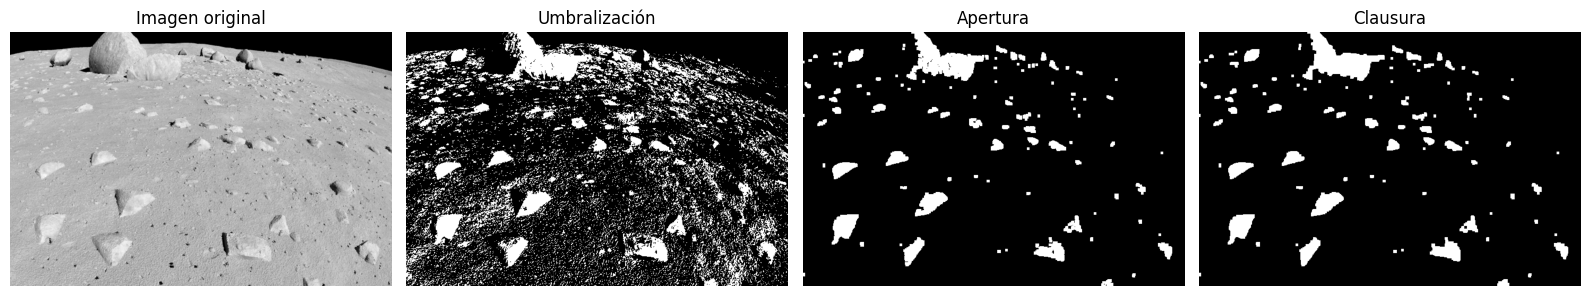

In [7]:
image_path = "./images/render/render0036.png"

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

## Umbralizacion usando otsu
_, binary_image = cv2.threshold(image, 175, 255, cv2.THRESH_BINARY)


## Primero hago una apertura y luego una clausura sobre la imagen binaria

## Apertura
kernel = np.ones((5, 5), np.uint8)

opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

## Cierre
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)




## Mostrar resultados
plt.figure(figsize=(16, 8))
# 1. Original Image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')
# 2. Imagen binaria
plt.subplot(1, 4, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Umbralización')
plt.axis('off')
# 3. Apertura
plt.subplot(1, 4, 3)
plt.imshow(opening, cmap='gray')
plt.title('Apertura')
plt.axis('off')
# 4. Clausura
plt.subplot(1, 4, 4)
plt.imshow(closing, cmap='gray')
plt.title('Clausura')
plt.axis('off')

plt.tight_layout()
plt.show()


## Umbralización Adaptativa

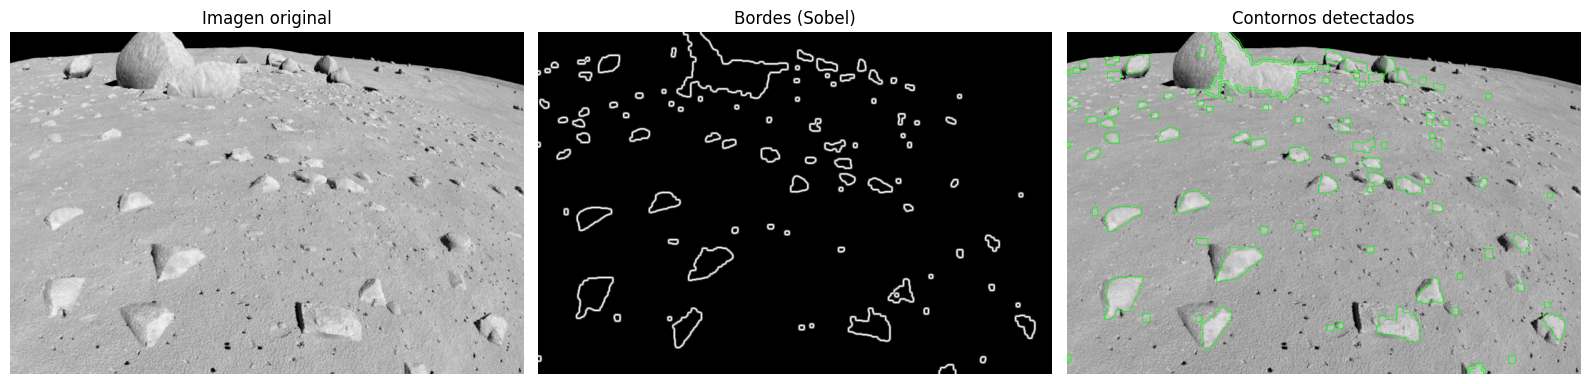

In [69]:

# Leer imagen en escala de grises
image = cv2.imread("./images/render/render0036.png", cv2.IMREAD_GRAYSCALE)

# Umbralización adaptativa
_, binary_img = cv2.threshold(image, 175, 255, cv2.THRESH_BINARY)

# Apertura para eliminar ruido pequeño
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

# Clausura para rellenar huecos pequeños
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Detectar bordes con Sobel
sobel_x = cv2.Sobel(closing, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(closing, cv2.CV_64F, 0, 1, ksize=5)
edges = cv2.magnitude(sobel_x, sobel_y)
# Normalizar a 0-255
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Encontrar contornos
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos sobre la imagen original (convertida a BGR)
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 1)  # verde

# Mostrar resultados
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Bordes (Sobel)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output)
plt.title("Contornos detectados")
plt.axis('off')

plt.tight_layout()
plt.show()


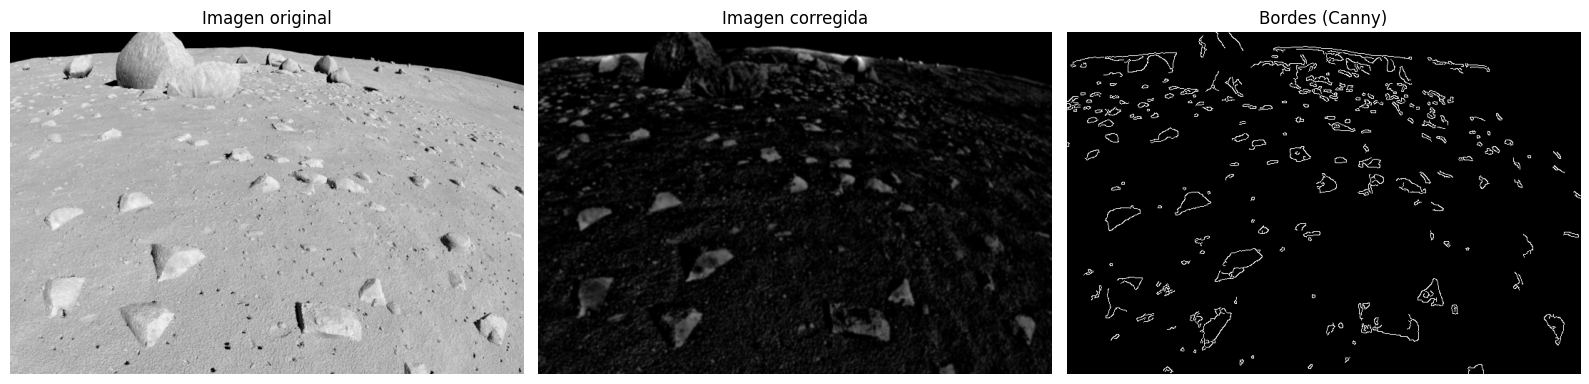

In [70]:
# a. Ecualización adaptativa
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_eq = clahe.apply(image)

# b. Eliminación del fondo suave
background = cv2.medianBlur(image_eq, 51)
corrected = cv2.subtract(image_eq, background)
corrected = cv2.GaussianBlur(corrected, (5, 5), 0)


# c. Umbral adaptativo
edges = cv2.Canny(corrected, 50, 150)


# Plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(corrected, cmap='gray')
plt.title("Imagen corregida")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Bordes (Canny)")
plt.axis('off')
plt.tight_layout()
plt.show()

# GRADIENTE + UMBRALIZACIÓN

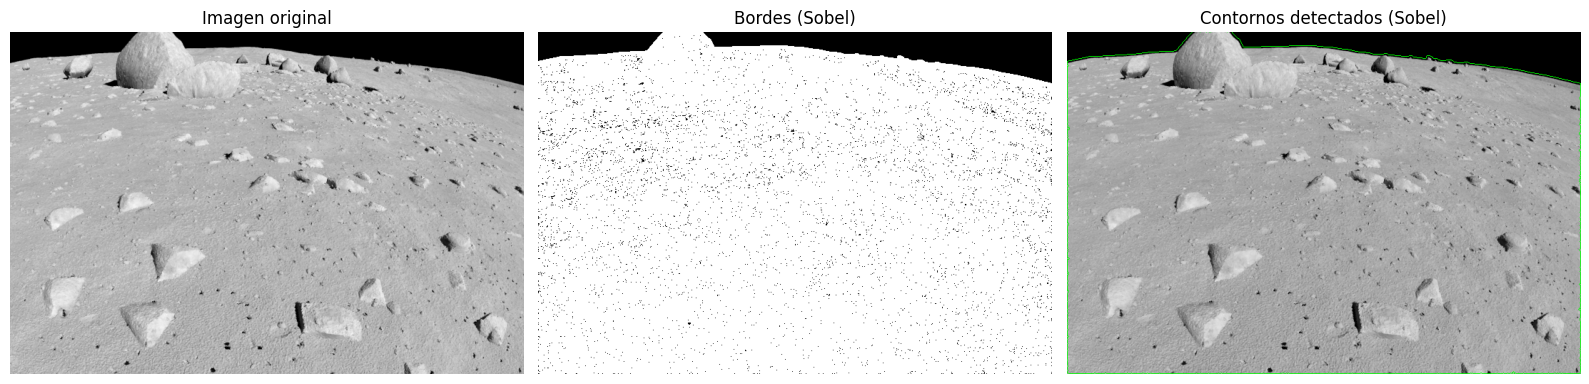

In [47]:
# Aplicar Sobel para detectar bordes
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(np.clip(sobel_magnitude, 0, 255))
# Aplicar umbralización
_, sobel_binary = cv2.threshold(sobel_magnitude, 50, 255, cv2.THRESH_BINARY)
# Encontrar contornos
contours_sobel, _ = cv2.findContours(sobel_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Dibujar contornos sobre la imagen original (convertida a BGR)
output_sobel = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_sobel, contours_sobel, -1, (0, 255, 0), 1)  # verde
# Mostrar resultados
plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(sobel_binary, cmap='gray')
plt.title("Bordes (Sobel)")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(output_sobel)
plt.title("Contornos detectados (Sobel)")
plt.axis('off')
plt.tight_layout()
plt.show()